# **Import Library yang dibutuhkan**

In [3]:
# Mengimport Library yang dibutuhkan

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Import Library yang dibutuhkan

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV


# **Load Dataset**

In [4]:
# Load Dataset

df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_MobileJKN_1.csv")
df.head()

,userName,score,at,content
0,Pengguna Google,1,2024-07-23 02:41:30,Aplikasi eror
1,Pengguna Google,1,2024-07-23 02:41:16,"Mau daftar susah sekali, nunggu SMS otp dari k..."
2,Pengguna Google,5,2024-07-23 02:39:41,Pelayanan memuaskan
3,Pengguna Google,5,2024-07-23 02:35:02,"Sangat membantu, terimakasih mobile JKN"
4,Pengguna Google,2,2024-07-23 02:32:12,ini kenapaa ga bisa terus dapet kode Verifikas...


In [5]:
# Menampilkan Column Content, Username, dan at.

df = df[['content']]
df

,content
0,Aplikasi eror
1,"Mau daftar susah sekali, nunggu SMS otp dari k..."
2,Pelayanan memuaskan
3,"Sangat membantu, terimakasih mobile JKN"
4,ini kenapaa ga bisa terus dapet kode Verifikas...
...,...
2495,Sangat Membantu.
2496,Sangat memper mudah kan urusan
2497,Mantap
2498,Kurang bagus


In [6]:
# Memberikan Informasi terkait Dataset yang digunakan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  2500 non-null   object
dtypes: object(1)
memory usage: 19.7+ KB


In [7]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.

df.describe()

,content
count,2500
unique,2020
top,Sangat membantu
freq,73


# **Pre - Processing**


1.   Cleaning Data
2.   Case Folding
3.   Normalization
4.   Stopword
5.   Tokenize
6.   Stemming
7.   Translate
8.   Labeling

# **Cleaning Data & Case Folding**

In [8]:
# Mengetahui jumlah berapa baris dan kolom.

df.shape

(2500, 1)

In [9]:
# Menghapus data yang duplicate

df = df.drop_duplicates(subset=['content'])

In [10]:
# Mengecek data yang duplikat

df.duplicated().sum()

0

In [11]:
# Menghapus data yang kosong

df = df.dropna()

In [12]:
# Memastikan tidak ada missing value yang tersisa.

df.isnull().sum()

content    0
dtype: int64

In [13]:
# Mengetahui jumlah berapa baris dan kolom setelahnya

df.shape

(2020, 1)

In [14]:
# Fungsi Cleaning Text

def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [15]:
# Fungsi Hapus Emoji

def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [16]:
# Mengaplikasikan Fungsi Cleaning Text, Emoji, dan Case Folding yang sudah dibuat kedalam column 'content'

df['cleaning'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,cleaning
0,Aplikasi eror,aplikasi eror
1,"Mau daftar susah sekali, nunggu SMS otp dari k...",mau daftar susah sekali nunggu sms otp dari ke...
2,Pelayanan memuaskan,pelayanan memuaskan
3,"Sangat membantu, terimakasih mobile JKN",sangat membantu terimakasih mobile jkn
4,ini kenapaa ga bisa terus dapet kode Verifikas...,ini kenapaa ga bisa terus dapet kode verifikas...
...,...,...
2494,Maaf saya kasih 3 bintang ajh soal di HP nya e...,maaf saya kasih bintang ajh soal di hp nya en...
2495,Sangat Membantu.,sangat membantu
2496,Sangat memper mudah kan urusan,sangat memper mudah kan urusan
2498,Kurang bagus,kurang bagus


# **Normalization**

In [17]:
# Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal",
        "kemare" : "kemarin",
        "dislek" : "dislike",
        "ngk" : "ngga",
        "mobeli" : "mobile",
        "bguss" : "bagus",
        "yyuy" : "",
        "sakarag" : "sekarang",
        "gbs" : "gabisa",
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['normalization'] = df['cleaning'].apply(lambda x: normalisasi(x))
df

,content,cleaning,normalization
0,Aplikasi eror,aplikasi eror,aplikasi eror
1,"Mau daftar susah sekali, nunggu SMS otp dari k...",mau daftar susah sekali nunggu sms otp dari ke...,mau daftar susah sekali nunggu sms otp dari ke...
2,Pelayanan memuaskan,pelayanan memuaskan,pelayanan memuaskan
3,"Sangat membantu, terimakasih mobile JKN",sangat membantu terimakasih mobile jkn,sangat membantu terimakasih mobile jkn
4,ini kenapaa ga bisa terus dapet kode Verifikas...,ini kenapaa ga bisa terus dapet kode verifikas...,ini kenapaa ga bisa terus dapet kode verifikas...
...,...,...,...
2494,Maaf saya kasih 3 bintang ajh soal di HP nya e...,maaf saya kasih bintang ajh soal di hp nya en...,maaf saya kasih bintang ajh soal di hp nya en...
2495,Sangat Membantu.,sangat membantu,sangat membantu
2496,Sangat memper mudah kan urusan,sangat memper mudah kan urusan,sangat memper mudah kan urusan
2498,Kurang bagus,kurang bagus,kurang bagus


# **Stopwords**

In [18]:
# Menginstall Library Sastrawi

!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.0 MB/s eta 0:00:00


In [19]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["dengan", "tidak", "aku", "engkau", "kamu", "beliau", "kalian", "kita", "sini", "situ", "sana",
                   "begini", "bapak", "ibu", "saudara", "tuan", "nyonya", "nona", "siapa", "apa", "mana", "kapan",
                   "bagaimana", "meski", "walaupun", "seandainya", "andai", "jikalau", "kini", "dulu", "sekarang",
                   "tadi", "besok", "lusa", "satu", "tiga", "pertama", "kedua", "ketiga", "sangat", "sekali", "terlalu",
                   "cukup", "lah", "tah", "yang", "nya", "untuk", "dan", "di", "ada", "saya", "ini", "banyak", "bisa", "ga",
                   "udah", "tapi", "sudah", "gak", "lagi", "sama", "lebih"]

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(more_stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['stopwords'] = df['normalization'].apply(lambda x: stopwords(x))
df

,content,cleaning,normalization,stopwords
0,Aplikasi eror,aplikasi eror,aplikasi eror,aplikasi eror
1,"Mau daftar susah sekali, nunggu SMS otp dari k...",mau daftar susah sekali nunggu sms otp dari ke...,mau daftar susah sekali nunggu sms otp dari ke...,mau daftar susah nunggu sms otp dari kemarin s...
2,Pelayanan memuaskan,pelayanan memuaskan,pelayanan memuaskan,pelayanan memuaskan
3,"Sangat membantu, terimakasih mobile JKN",sangat membantu terimakasih mobile jkn,sangat membantu terimakasih mobile jkn,membantu terimakasih mobile jkn
4,ini kenapaa ga bisa terus dapet kode Verifikas...,ini kenapaa ga bisa terus dapet kode verifikas...,ini kenapaa ga bisa terus dapet kode verifikas...,kenapaa bisa terus dapet kode verifikasi padah...
...,...,...,...,...
2494,Maaf saya kasih 3 bintang ajh soal di HP nya e...,maaf saya kasih bintang ajh soal di hp nya en...,maaf saya kasih bintang ajh soal di hp nya en...,maaf kasih bintang ajh soal hp engtidak tolon...
2495,Sangat Membantu.,sangat membantu,sangat membantu,membantu
2496,Sangat memper mudah kan urusan,sangat memper mudah kan urusan,sangat memper mudah kan urusan,memper mudah kan urusan
2498,Kurang bagus,kurang bagus,kurang bagus,kurang bagus


# **Tokenize**

In [20]:
# Tokenize

df['tokenized'] = df['stopwords'].apply(lambda x:x.split())
df

,content,cleaning,normalization,stopwords,tokenized
0,Aplikasi eror,aplikasi eror,aplikasi eror,aplikasi eror,"[aplikasi, eror]"
1,"Mau daftar susah sekali, nunggu SMS otp dari k...",mau daftar susah sekali nunggu sms otp dari ke...,mau daftar susah sekali nunggu sms otp dari ke...,mau daftar susah nunggu sms otp dari kemarin s...,"[mau, daftar, susah, nunggu, sms, otp, dari, k..."
2,Pelayanan memuaskan,pelayanan memuaskan,pelayanan memuaskan,pelayanan memuaskan,"[pelayanan, memuaskan]"
3,"Sangat membantu, terimakasih mobile JKN",sangat membantu terimakasih mobile jkn,sangat membantu terimakasih mobile jkn,membantu terimakasih mobile jkn,"[membantu, terimakasih, mobile, jkn]"
4,ini kenapaa ga bisa terus dapet kode Verifikas...,ini kenapaa ga bisa terus dapet kode verifikas...,ini kenapaa ga bisa terus dapet kode verifikas...,kenapaa bisa terus dapet kode verifikasi padah...,"[kenapaa, bisa, terus, dapet, kode, verifikasi..."
...,...,...,...,...,...
2494,Maaf saya kasih 3 bintang ajh soal di HP nya e...,maaf saya kasih bintang ajh soal di hp nya en...,maaf saya kasih bintang ajh soal di hp nya en...,maaf kasih bintang ajh soal hp engtidak tolon...,"[maaf, kasih, bintang, ajh, soal, hp, engtidak..."
2495,Sangat Membantu.,sangat membantu,sangat membantu,membantu,[membantu]
2496,Sangat memper mudah kan urusan,sangat memper mudah kan urusan,sangat memper mudah kan urusan,memper mudah kan urusan,"[memper, mudah, kan, urusan]"
2498,Kurang bagus,kurang bagus,kurang bagus,kurang bagus,"[kurang, bagus]"


# **Stemming**

In [21]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# df['steamming'] = df['tokenized'].apply(stemming)

# df['steamming'].to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_MobileJKN_1.csv', index = False)


In [22]:
df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_MobileJKN_1.csv', encoding = 'latin1')
df_steamming

,steamming
0,aplikasi eror
1,mau daftar susah nunggu sms otp dari kemarin s...
2,layan muas
3,bantu terimakasih mobile jkn
4,kenapaa bisa terus dapet kode verifikasi padah...
...,...
2015,maaf kasih bintang aja soal hp enggak tolong d...
2016,bantu
2017,memper mudah kan urus
2018,kurang bagus


# **Translate**

In [23]:
# # Menginstall Library easynmt

# !pip install -U easynmt

In [24]:
# import pandas as pd
# from easynmt import EasyNMT

In [25]:
# # Load Data Hasil Stemming

# df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_MobileJKN_1.csv', encoding = 'latin1')


In [26]:
# # Menentukan Asal & Target Bahasa yang akan diterjemahkan

# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [27]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [28]:
# # Imputing NaN Values

# df_values = df_steamming.fillna(method = 'pad')
# df_values

In [29]:
# # Mengaplikasikan Fungsi Translate yang sudah dibuat kedalam column 'content'

# df_values['steamming_en'] = df_values['steamming'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df_values.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_MobileJKN_1.csv')

In [30]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_MobileJKN_1.csv', index_col=0)
df_values

,steamming,steamming_en
0,aplikasi eror,error application
1,mau daftar susah nunggu sms otp dari kemarin s...,Want to sign up It's hard to wait for text mes...
2,layan muas,mustard layer
3,bantu terimakasih mobile jkn,Help. Thank you. Mobile.
4,kenapaa bisa terus dapet kode verifikasi padah...,Why does it keep getting verification codes wh...
...,...,...
2015,maaf kasih bintang aja soal hp enggak tolong d...,"fontcolor="" # FFFF00""Sorry fontcolor="" # FFFF0..."
2016,bantu,Help.
2017,memper mudah kan urus,Make it easier to take care of.
2018,kurang bagus,It's not good.


# **Labeling**

In [31]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_MobileJKN_1.csv', index_col=0)
df_values


,steamming,steamming_en
0,aplikasi eror,error application
1,mau daftar susah nunggu sms otp dari kemarin s...,Want to sign up It's hard to wait for text mes...
2,layan muas,mustard layer
3,bantu terimakasih mobile jkn,Help. Thank you. Mobile.
4,kenapaa bisa terus dapet kode verifikasi padah...,Why does it keep getting verification codes wh...
...,...,...
2015,maaf kasih bintang aja soal hp enggak tolong d...,"fontcolor="" # FFFF00""Sorry fontcolor="" # FFFF0..."
2016,bantu,Help.
2017,memper mudah kan urus,Make it easier to take care of.
2018,kurang bagus,It's not good.


In [32]:
# Menginstall Library Text-Blob, Worldcould

!pip install textblob
!pip install wordcloud

In [33]:
# Import Library yang dibutuhkan

from textblob import TextBlob


In [34]:
# Labeling With TextBlob

data_review = list(df_values['steamming_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 791
Netral = 789
Negatif = 440

Total Data Seluruhnya : 2020


In [35]:
# Melihat Status Sentimen

df_values['sentimen'] = status
df_values

,steamming,steamming_en,sentimen
0,aplikasi eror,error application,Netral
1,mau daftar susah nunggu sms otp dari kemarin s...,Want to sign up It's hard to wait for text mes...,Positif
2,layan muas,mustard layer,Netral
3,bantu terimakasih mobile jkn,Help. Thank you. Mobile.,Netral
4,kenapaa bisa terus dapet kode verifikasi padah...,Why does it keep getting verification codes wh...,Netral
...,...,...,...
2015,maaf kasih bintang aja soal hp enggak tolong d...,"fontcolor="" # FFFF00""Sorry fontcolor="" # FFFF0...",Negatif
2016,bantu,Help.,Netral
2017,memper mudah kan urus,Make it easier to take care of.,Netral
2018,kurang bagus,It's not good.,Negatif


In [36]:
# Mengimplementasikan Variabel data_final

data_final = df_values
data_final

,steamming,steamming_en,sentimen
0,aplikasi eror,error application,Netral
1,mau daftar susah nunggu sms otp dari kemarin s...,Want to sign up It's hard to wait for text mes...,Positif
2,layan muas,mustard layer,Netral
3,bantu terimakasih mobile jkn,Help. Thank you. Mobile.,Netral
4,kenapaa bisa terus dapet kode verifikasi padah...,Why does it keep getting verification codes wh...,Netral
...,...,...,...
2015,maaf kasih bintang aja soal hp enggak tolong d...,"fontcolor="" # FFFF00""Sorry fontcolor="" # FFFF0...",Negatif
2016,bantu,Help.,Netral
2017,memper mudah kan urus,Make it easier to take care of.,Netral
2018,kurang bagus,It's not good.,Negatif


# **Visualization**


1.   Bar Plot
2.   Pie Chart
3.   Wordcloud



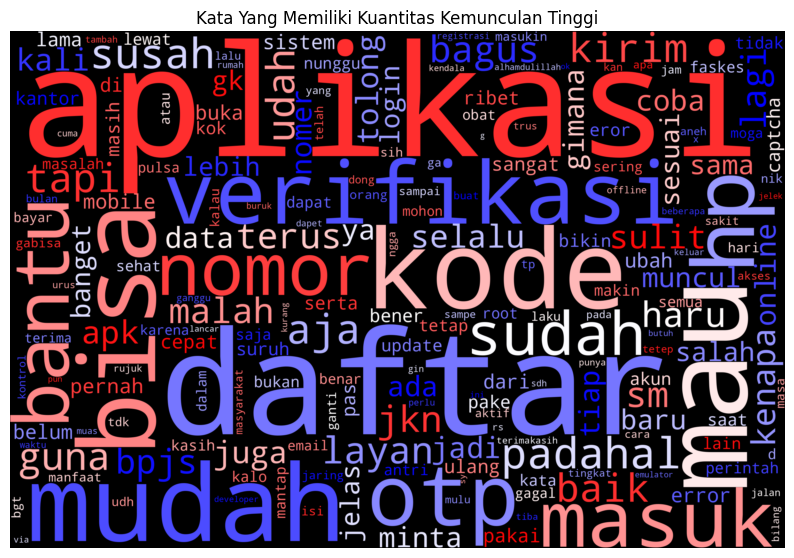

In [37]:
# Visualisasi Kata Yang Memiliki Kuantitas Kemunculan Paling Tinggi

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Kemunculan Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in data_final['steamming']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


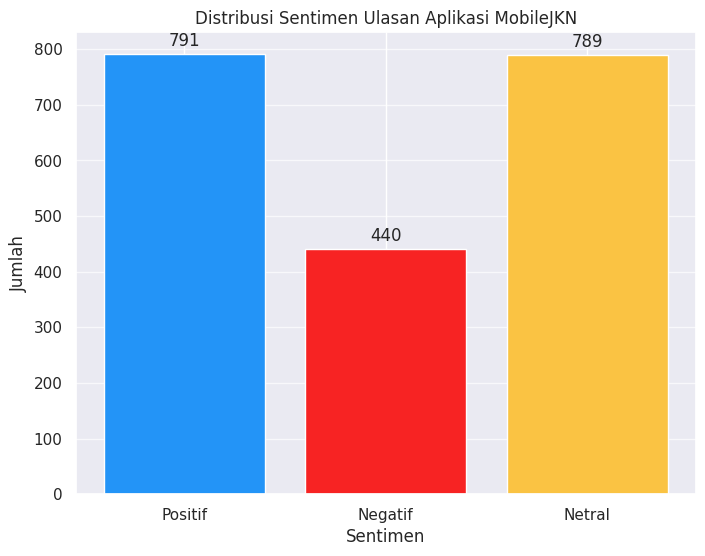

In [38]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi MobileJKN")


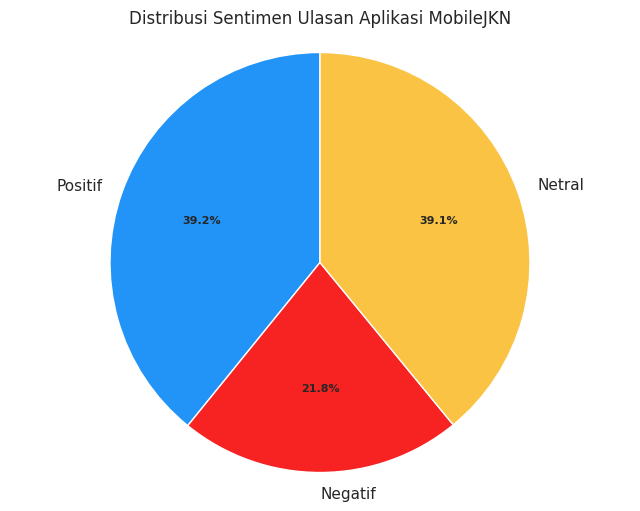

In [39]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi MobileJKN")

In [40]:
# Menghapus Sentimen Netral

data_final = data_final[data_final['sentimen'] != 'Netral']
data_final

,steamming,steamming_en,sentimen
1,mau daftar susah nunggu sms otp dari kemarin s...,Want to sign up It's hard to wait for text mes...,Positif
5,susah verifikasi nomor hp gilir sudah malah no...,It's hard to verify the number The phone numbe...,Negatif
7,oke mantap,Okay. That's great.,Positif
8,aplikasi ya bagus namun pada saat ubah data al...,application is good but when changing address ...,Positif
9,bisa urus bayar auto debit karena mau aktif ke...,can take care of paying auto-dependent due to ...,Negatif
...,...,...,...
2007,bagus bantu tanpa haru kantor bpjs lagi,It's good to help out without having to go to ...,Positif
2008,makin kesini kok makin parah sering error bisa...,It's getting worse. The more the online list g...,Positif
2015,maaf kasih bintang aja soal hp enggak tolong d...,"fontcolor="" # FFFF00""Sorry fontcolor="" # FFFF0...",Negatif
2018,kurang bagus,It's not good.,Negatif


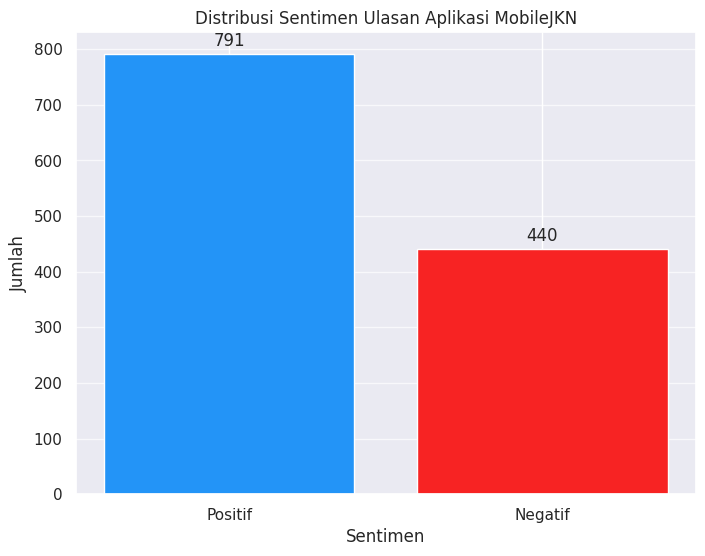

In [41]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi MobileJKN")


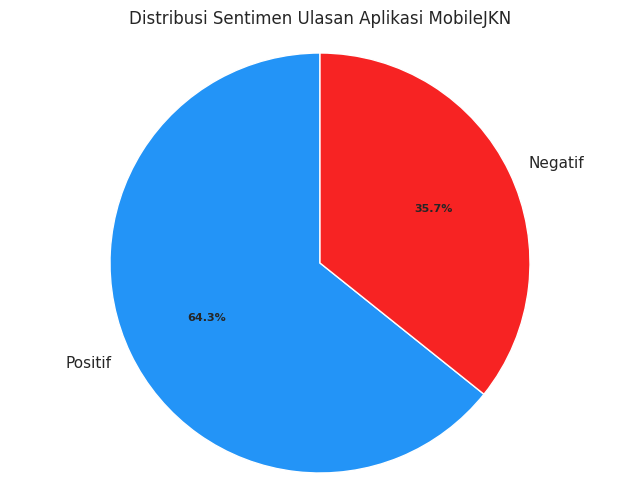

In [42]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi MobileJKN")

In [43]:
# Replace Data Sentimen

data_final = data_final.replace({'Positif':0, 'Negatif':1})
data_final

,steamming,steamming_en,sentimen
1,mau daftar susah nunggu sms otp dari kemarin s...,Want to sign up It's hard to wait for text mes...,0
5,susah verifikasi nomor hp gilir sudah malah no...,It's hard to verify the number The phone numbe...,1
7,oke mantap,Okay. That's great.,0
8,aplikasi ya bagus namun pada saat ubah data al...,application is good but when changing address ...,0
9,bisa urus bayar auto debit karena mau aktif ke...,can take care of paying auto-dependent due to ...,1
...,...,...,...
2007,bagus bantu tanpa haru kantor bpjs lagi,It's good to help out without having to go to ...,0
2008,makin kesini kok makin parah sering error bisa...,It's getting worse. The more the online list g...,0
2015,maaf kasih bintang aja soal hp enggak tolong d...,"fontcolor="" # FFFF00""Sorry fontcolor="" # FFFF0...",1
2018,kurang bagus,It's not good.,1


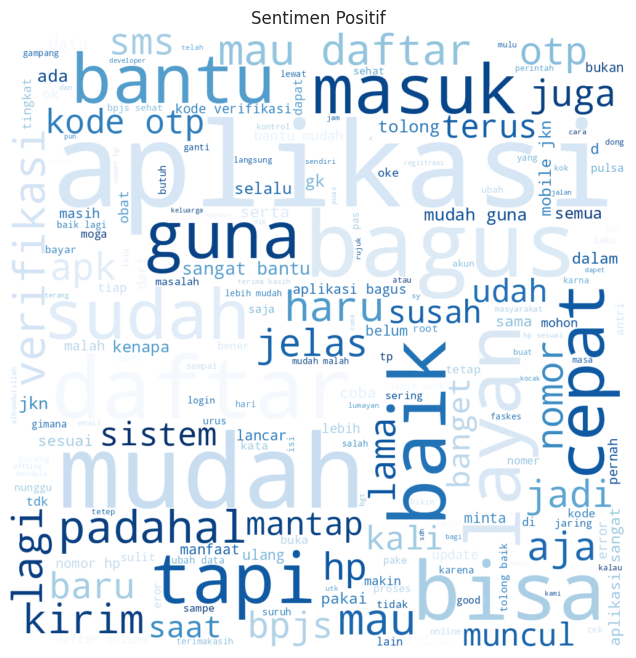

In [44]:
# Visualisasi Wordcould Positif & Negatif

data_positif = data_final[data_final['sentimen'] == 0]
data_negatif = data_final[data_final['sentimen'] == 1]

# Sentimen Positif

all_words = ' '.join([reviews for reviews in data_positif['steamming']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

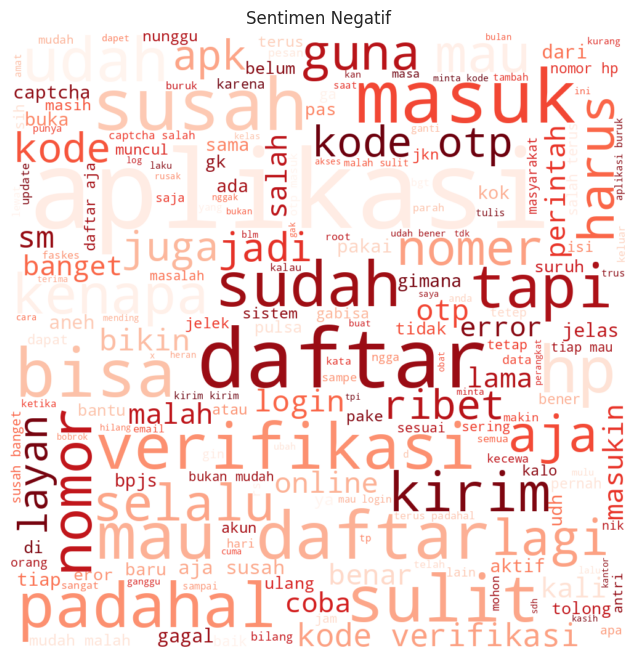

In [45]:
# Sentimen Negatif

all_words = ' '.join([reviews for reviews in data_negatif['steamming']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

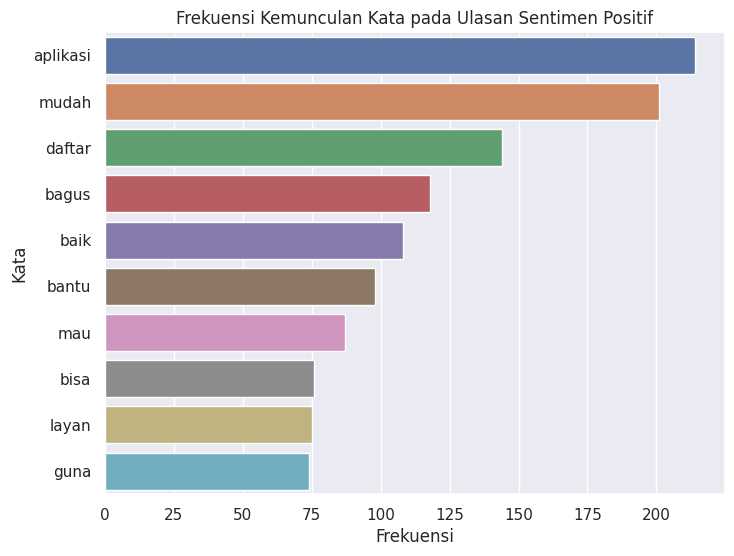

In [46]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif

# Memfilter ulasan dengan sentimen positif
positive_reviews = data_final[data_final['sentimen'] == 0]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(positive_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 10
top_words_positive = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_positive)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [47]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen positif : \n")
print(top_words_positive.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen positif : 

    kata  frekuensi
aplikasi        214
   mudah        201
  daftar        144
   bagus        118
    baik        108
   bantu         98
     mau         87
    bisa         76
   layan         75
    guna         74


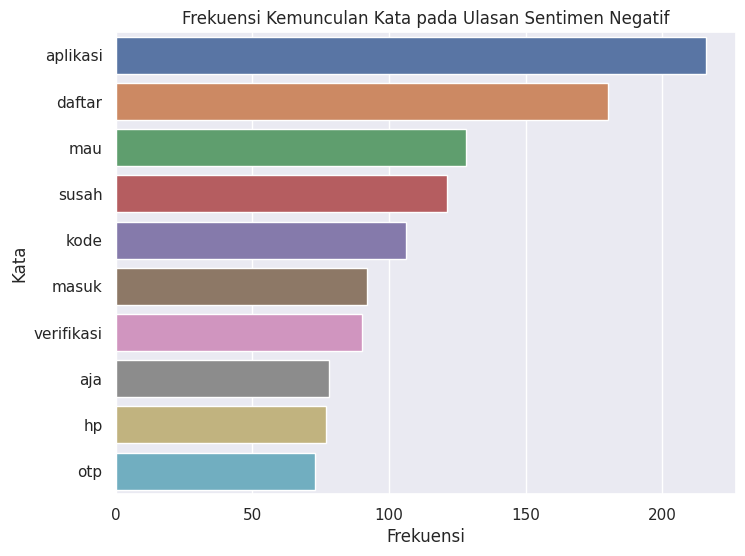

In [48]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif

# Memfilter ulasan dengan sentimen positif
negative_reviews = data_final[data_final['sentimen'] == 1]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(negative_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 10
top_words_negative = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_negative)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [49]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : \n")
print(top_words_negative.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : 

      kata  frekuensi
  aplikasi        216
    daftar        180
       mau        128
     susah        121
      kode        106
     masuk         92
verifikasi         90
       aja         78
        hp         77
       otp         73


In [50]:
# Menghitung Jumlah Sentimen Positif, Negatif

data_final['sentimen'].value_counts()

sentimen
0    791
1    440
Name: count, dtype: int64

# **Transormation & Data Preparation**

In [51]:
# Memisahkan data menjadi data latih dan data uji [ Splitting Data ]

X = data_final['steamming']
y = data_final['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [52]:
# Menggunakan TF - IDF Vectorizer untuk mengubah teks menjadi fitur numerik [ Text Vectorizer ]

vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [53]:
# Melakukan oversampling menggunakan Random Over-Sampling pada data latih

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_vec, y_train)

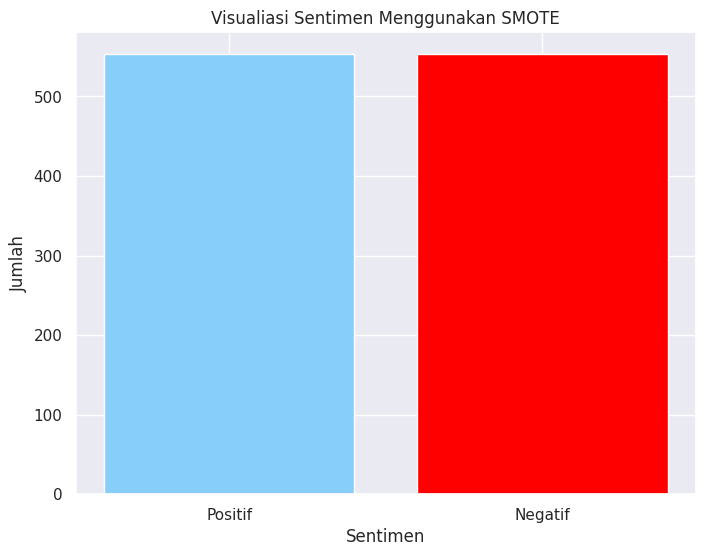

In [54]:
# Visualiasi data hasil resampling menggunakan SMOTE

sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['lightskyblue', 'red'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Positif', 'Negatif'])
plt.show()

# **Data Mining**

In [55]:
# Import Library Warning
import warnings
warnings.filterwarnings('ignore')

In [56]:
X_train_resampled.toarray()

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.1919365, 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [57]:
# Membangun Model Support vector Machine

for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
  svm = LinearSVC(C=c)
  svm.fit(X_train_resampled, y_train_resampled)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(X_test_vec))))

Akurasi untuk c = 0.01: 0.7702702702702703
Akurasi untuk c = 0.05: 0.772972972972973
Akurasi untuk c = 0.25: 0.8081081081081081
Akurasi untuk c = 0.5: 0.7972972972972973
Akurasi untuk c = 0.75: 0.7945945945945946
Akurasi untuk c = 1: 0.7945945945945946


In [58]:
# Menginisialisasi classifier SVM linier,
# membungkusnya dengan model kalibrasi untuk meningkatkan prediksi probabilitasnya,
# dan kemudian melatih model gabungan tersebut pada data pelatihan.

linear_svc = LinearSVC(C = 1.0)
calibrated_svc = CalibratedClassifierCV(linear_svc)
calibrated_svc.fit(X_train_vec, y_train)

CalibratedClassifierCV(estimator=LinearSVC())

# **Interpretation / Evaluation**


1.   Classification Report
2.   Confusion Matrix
3.   Classification Accuracy
4.   Classification Error




In [59]:
# Final Accuracy Score Model

print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(X_test_vec)))

Accuracy score model final: 0.7945945945945946 


In [60]:
# Classification Report

from sklearn.metrics import confusion_matrix

# Evaluasi Model
y_pred = svm.predict(X_test_vec)
print('Akurasi Model Support Vector Machine : {:.4f}' .format(svm.score(X_test_vec, y_test)))

print("\nLaporan Klasifikasi :\n", classification_report(y_test, y_pred))

Akurasi Model Support Vector Machine : 0.7946

Laporan Klasifikasi :
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       238
           1       0.70      0.75      0.72       132

    accuracy                           0.79       370
   macro avg       0.78      0.78      0.78       370
weighted avg       0.80      0.79      0.80       370



In [61]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])

print('\nTrue Negatives (TN) = ', cm[1, 1])

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])



print('\nAccuracy = ', accuracy)

Confusion matrix

 [[195  43]
 [ 33  99]]

True Positives (TP) =  195

True Negatives (TN) =  99

False Positives (FP) =  43

False Negatives (FN) =  33

Accuracy =  0.7945945945945946


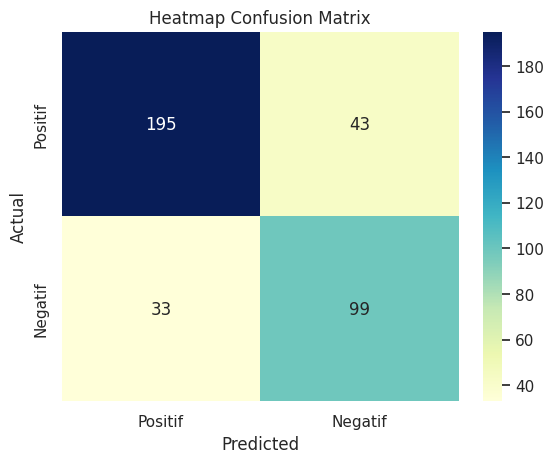

In [62]:
# Visualisasi Heatmap Confusion Matrix

cm_matrix = pd.DataFrame(data=cm, columns=['Positif', 'Negatif'],
                         index=['Positif', 'Negatif'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap Confusion Matrix')
plt.show()

In [63]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


In [64]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7946


In [65]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2054


# **Testing**

In [69]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : Sangat susah untuk mendapat kode verifikasi otp padahal no juga masih aktif sedangkan untuk email bisa tapi yang wajib di isi no hp tapi kode otp hp ditunggu sampai 20 menit tidak ada yg masuk. Tolong diperbaiki karena untuk mendaftar saja tidak bisa lalu bagaimana mau menggunakan nya.
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 65.55%
Probabilitas: 65.55458863142259 %


In [67]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : aplikasi ini bagus banget,tampa ribet,tampa kita harus ngurus ketempat bbjsnya langsung,lewat aplikasi online bisa seperti mobile jkn ini,saat ngurus bbjs kita,ok semangat, kinerja yang bagus.
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 88.71%
Probabilitas: 88.71413626728759 %
